In [1]:
# 설치한 폰트 설정 저 파일 위치의 폰트들을 확인해서 긁어옴.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
#기본 폰트 설정
mpl.rcParams['font.family'] = 'Hancom Gothic' # 전체 범위에 대해 폰트 설정을 적용
#mpl.rc('font',family = 'NanumGothic') # 위의 명령어와 같은 명령어이다.
mpl.rcParams['axes.unicode_minus'] = False # unicode minus 설정을 False해줌으로써 ASCII hyphen의 -1로 넣어준다. unicode -1은 꺠질 가능성이 있기 때문임.

In [2]:
import pandas as pd
import numpy as np
mpl.rcParams['font.size'] = 14 # 기본 font size
mpl.rcParams['figure.figsize'] = (9,5) # 기본 fig size
mpl.rcParams['figure.facecolor'] = '#00000000' # 기본 배경색

# 노인 vs 비노인에 대한 사고 부상정도 차이 표

In [7]:
# 노인 교통사고 자료 데이터 추출
import warnings
warnings.simplefilter("ignore") # xls 파일을 읽어오는데 발생하는 경고문을 제거하는 역할이다.
#xls 파일을 읽어와서 원하는 행열만 뽑아내는 과정이다.
accident_rate = pd.read_excel('C:\\playdata\\23_02_01_python_mini_project\\accident.xls',skiprows=[1,2],usecols=[1,2,3,4,5,6,7,13],names=['지역구','지점명','건수','사망','중상','경상','부상','치사율'])
accident_rate_sum = accident_rate[0:751].sum()# 데이터에 남아있는 끝 쓰레기 값을 제거하고 지역구별로 남아있는 데이터를 sum()을 통해 전부 합쳐준다.
acc = accident_rate_sum[2:6].sort_values(ascending = False) # 지역구 이름과 지점명, 치사율을 제거한 전체 부상자 수만을 추출하고 정렬한다.
old_acc = acc*100/acc.sum() # 백분율로 저장하기 위해 값을 전체 사고수로 나누어 주고 100을 곱한다.

#노인이 아닌 모든 사람의 교통사고 자료 데이터 추출(동일한 과정을 거친다.)
accident_normal = pd.read_excel('C:\\playdata\\23_02_01_python_mini_project\\every_accident.xls',skiprows=[1,2],usecols=[1,2,3,4,5,6,15],names=['지역구','건수','사망','중상','경상','부상','치사율'])
accident_normal_sum = accident_normal[:25].sum()[2:6].sort_values(ascending = False)
accident_normal_sum = accident_normal_sum - acc # 전체 데이터 - 노인 교통사고 데이터  를 벡터화 연산으로 처리한다.
acc_normal = accident_normal_sum * 100 / accident_normal_sum.sum()

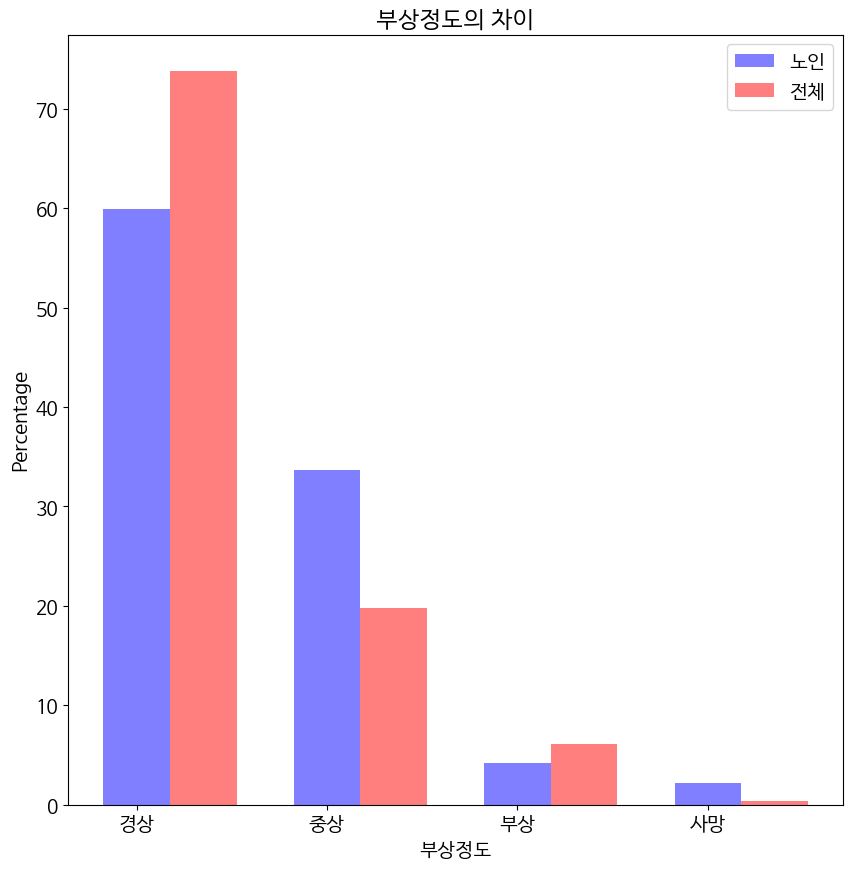

In [9]:
#노인과 나머지 교통사고 부상정도 비율을 나타내는 bar 표 제작
bar_width = 0.35
alpha = 0.5
plt.figure(figsize = (10,10))
plt.title('부상정도의 차이')
plt.xlabel('부상정도')
plt.ylabel('Percentage')
N = len(old_acc)  # x축의 개수를 세어준다.
index = np.arange(N) # N개 만큼 index를 list형태로 만들어준다.
p1 = plt.bar(old_acc.index,old_acc.values,bar_width,color = 'b',alpha = alpha,label = 'old')
p2 = plt.bar(index+bar_width,acc_normal.values,bar_width,color = 'r',alpha = alpha,label = 'every') # bar 플롯에 x 축에 index값 + bar_width로 같은 plot에 두개의 bar plot을 그린다.
plt.legend((p1,p2),('노인','전체'),fontsize = 14)
plt.show()

# 노인 사고원인에 대한 시각화

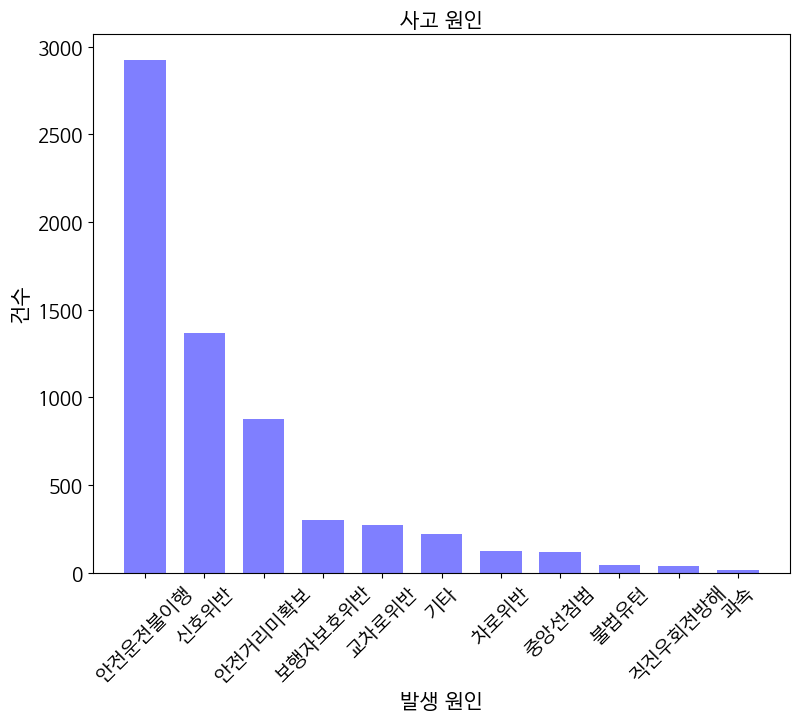

In [11]:
law_csv = pd.read_csv('C:\\playdata\\23_02_01_python_mini_project\\law.csv') # 노인사고 데이터를 가져온다.
law_csv = law_csv.sum()[:11].sort_values(ascending = False) # 지역구별로 나누어져 있는 데이터를 sum()으로 합치고, 사고원인 데이터를 슬라이싱으로 추출한다.
 
plt.figure(figsize = (9,7))
plt.title('사고 원인',fontsize = 15)
plt.xlabel('발생 원인',fontsize = 15)
plt.ylabel('건수',fontsize = 15)
plt.xticks(rotation = 45)# x축 ticks가 겹쳐서 rotation을 통해 돌려주었다.
plt.bar(law_csv.index,law_csv.values,0.7,color = 'b',alpha = alpha,label = 'old')
plt.show()

# 노인 인구 표

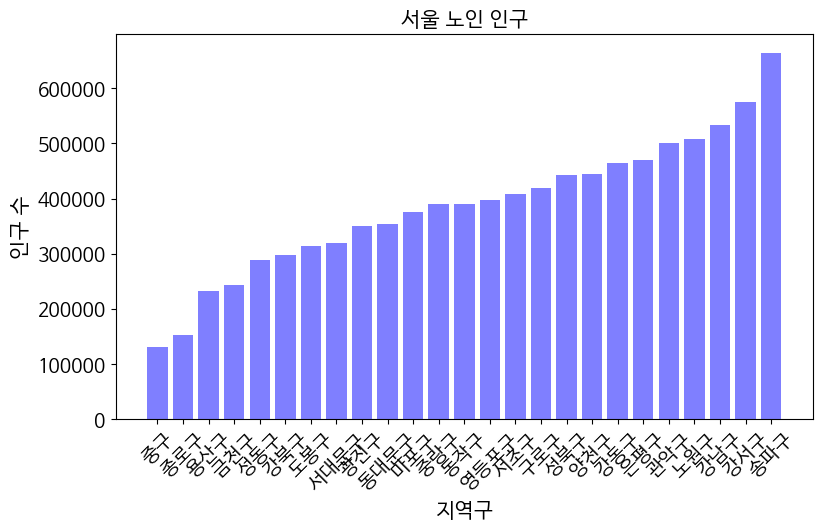

In [12]:
data_older_population = pd.read_csv('C:\\playdata\\23_02_01_python_mini_project\\data_older_population.csv') # 서울시 노인 인구 데이터를 가져온다.
data_older_population = data_older_population.astype({'소계':'int'})
data_older_population = data_older_population.sort_values('소계') 
plt.bar(data_older_population["동별"], data_older_population["소계"], color = 'b',alpha = alpha) # 지역구 별 데이터를 추출한다.
plt.title('서울 노인 인구',fontsize = 15)
plt.xlabel('지역구',fontsize = 15)
plt.ylabel('인구 수',fontsize = 15)
plt.xticks(rotation=45)
plt.show()